#PROJETO DE CIÊNCIA DE DADOS E MACHINE LEARNING

##Imports e Carregando Dataset

In [2]:
import pandas as pd  # Biblioteca para manipulação e análise de dados
from sklearn.datasets import load_breast_cancer  # Dataset pré-carregado de câncer de mama
from sklearn.model_selection import train_test_split  # Função para dividir o dataset em treino e teste
from sklearn.metrics import confusion_matrix, accuracy_score  # Métricas de avaliação de modelos
from sklearn.ensemble import RandomForestClassifier  # Modelo de classificação Random Forest
from sklearn.preprocessing import MinMaxScaler  # Normalização dos dados
from sklearn.svm import SVC  # Modelo de classificação SVM
import seaborn as sns  # Biblioteca para visualização de dados
import matplotlib.pyplot as plt  # Biblioteca para plotar gráficos

# Carrega o dataset e cria um DataFrame com os dados
data = load_breast_cancer()
df_cancer = pd.DataFrame(data.data, columns=data.feature_names)

# Adiciona a coluna de classes (0 = maligno, 1 = benigno)
df_cancer['class'] = data.target

pd.set_option('display.max_columns', None)
df_cancer.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


##Selecionando Variáveis

In [3]:
# Seleciona apenas quatro variáveis para análise
df_cancer = df_cancer[['mean radius', 'mean texture', 'mean perimeter', 'mean area']]
df_cancer['class'] = data.target
df_cancer.head()

<ipython-input-3-4f518275a29b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancer['class'] = data.target


,mean radius,mean texture,mean perimeter,mean area,class
0,17.99,10.38,122.80,1001.0,0
1,20.57,17.77,132.90,1326.0,0
2,19.69,21.25,130.00,1203.0,0
3,11.42,20.38,77.58,386.1,0
4,20.29,14.34,135.10,1297.0,0


##Vizualização de Dados

###PAIRPLOT com o SEABORN

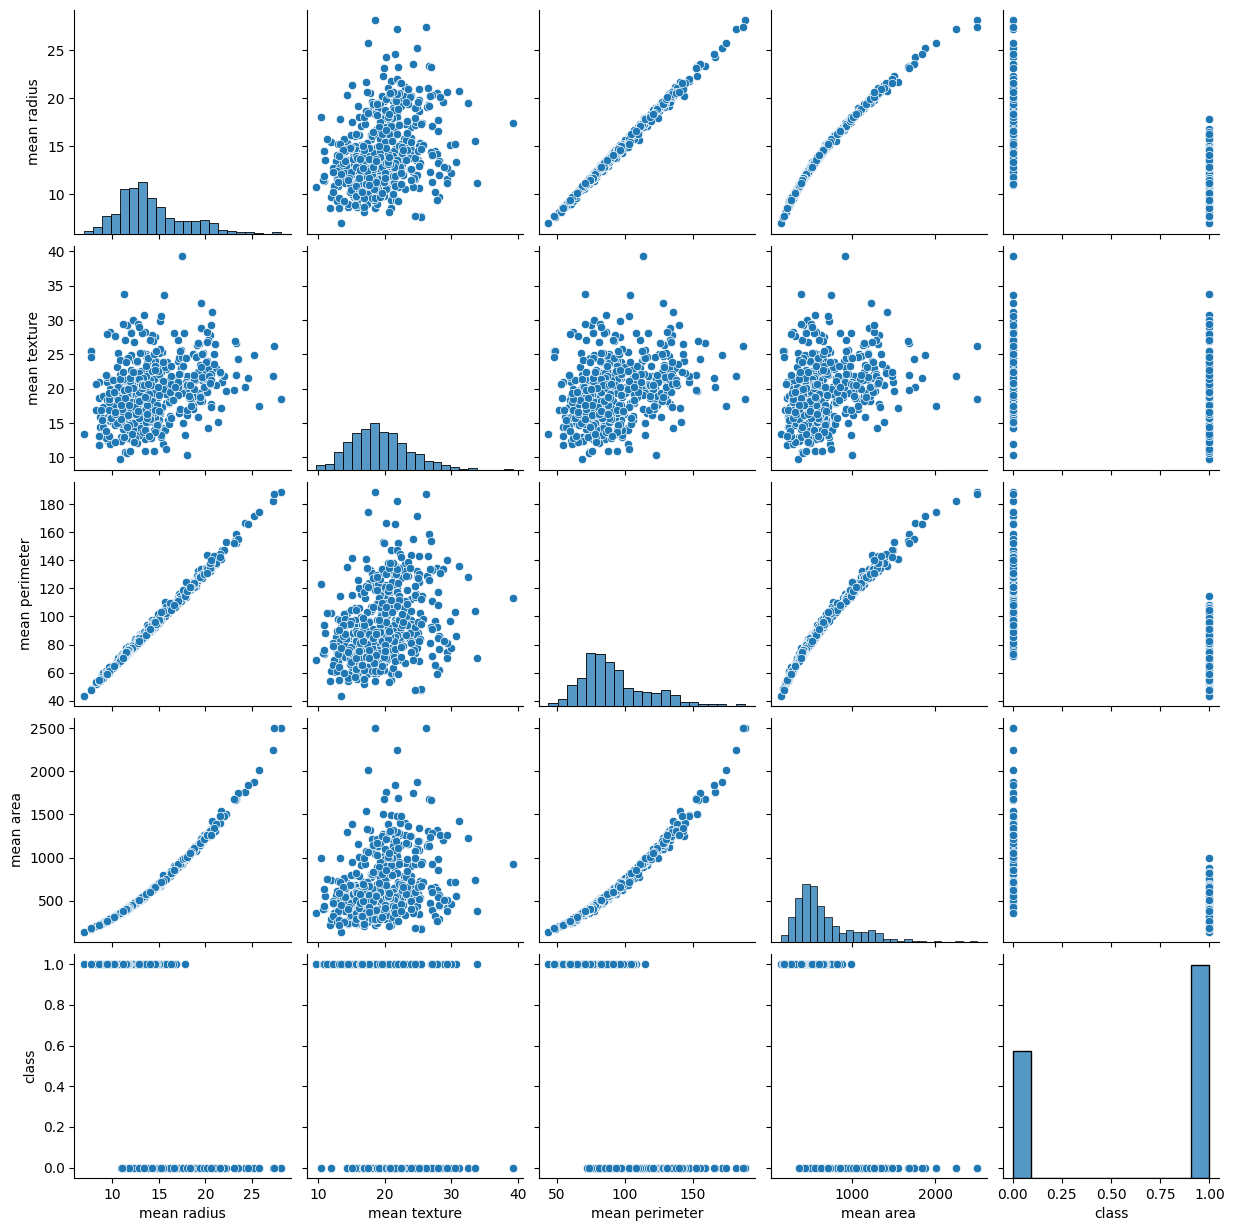

In [4]:
# Cria um gráfico de dispersão entre as variáveis com separação pelas classes
sns.pairplot(df_cancer)

### Gráfico de correlação

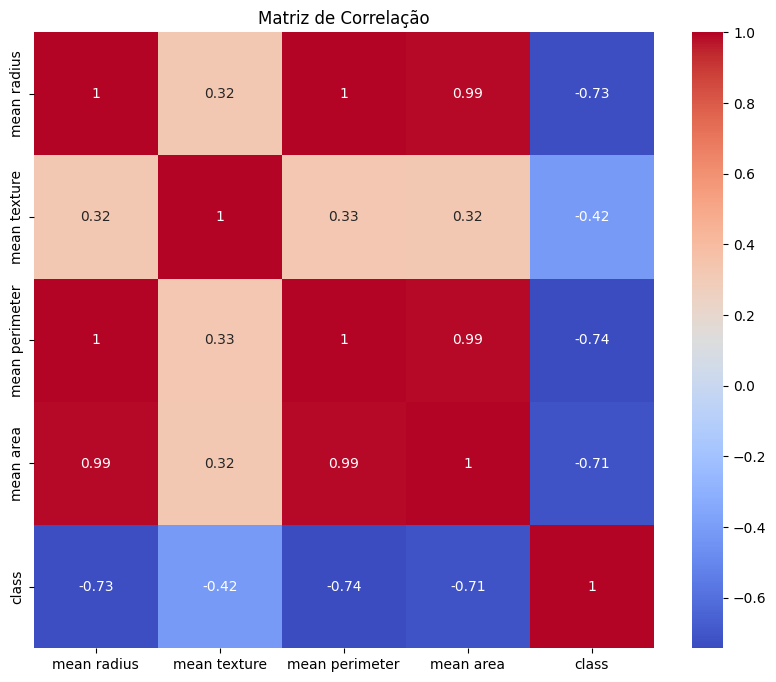

In [5]:
# Calcula a matriz de correlação entre as variáveis
corr = df_cancer.corr() #calculando matriz de correlação

# Plota a matriz de correlação com cores para facilitar a análise visual
plt.figure(figsize = (10,8))
plt.title('Matriz de Correlação')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


###Análise da matriz de correlação

mean radius × mean perimeter: 1.00(forte) - Os dois atributos crescem juntos quase de forma linear

mean radius x mean area: 0.99(forte) - Quanto maior o raio médio, maior a área do tumor

mean perimeter x mean area: 0.99(forte) - Maiores perimetros estão associados a maiores áreas de tumor

mean texture x demais variáveis: 0.32-0.33(Moderada) - A textura tem uma relação mais fraca em relação aos outros atributos

OBS: Nestre projeto consideramos apenas as correlações positivas

##APLICAÇÃO DE MODELOS DE MACHINE LEARNING PARA PREVER SE O TUMOR É BENIGNO OU MALIGNO


###Pré-processamento com MinMaxScaler

In [6]:
# Separa a variável alvo (classe) e os preditores
classe = df_cancer['class']
df_previsores = df_cancer[['mean radius', 'mean texture', 'mean perimeter', 'mean area']]

# Aplica a normalização dos dados para deixá-los entre 0 e 1
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_previsores), columns=df_previsores.columns)
df_normalized.head()


,mean radius,mean texture,mean perimeter,mean area
0,0.521037,0.022658,0.545989,0.363733
1,0.643144,0.272574,0.615783,0.501591
2,0.601496,0.390260,0.595743,0.449417
3,0.210090,0.360839,0.233501,0.102906
4,0.629893,0.156578,0.630986,0.489290


###Divisão em treino e teste

In [7]:
# Divide os dados em 75% para treino e 25% para teste
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(df_normalized,
                                                                  classe,
                                                                  test_size=0.25,
                                                                  random_state=42)


###Treinamento com Random Forest

In [8]:
# Cria e configura o classificador Random Forest
rf_classifier = RandomForestClassifier(
    n_estimators = 100,
    criterion = 'gini',
    max_depth= None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# Treina o modelo com os dados de treinamento
rf_classifier.fit(X_treinamento, Y_treinamento)

RandomForestClassifier(n_jobs=-1, random_state=42)

###Avaliação do modelo Random Forest

In [9]:
# Realiza a predição com os dados de teste
y_pred = rf_classifier.predict(X_teste)

# Calcula a acurácia da previsão
acurracy = accuracy_score(Y_teste, y_pred)
acurracy # Exibe o valor da acurácia

0.9370629370629371

###Matriz de confusão do Random Forest

In [10]:
# Gera a matriz de confusão
matriz_confusao = confusion_matrix(Y_teste, y_pred)
matriz_confusao #Exibe a matriz de confusão

array([[49,  5],
       [ 4, 85]])

###Gráfico matriz de confusão Random Forest

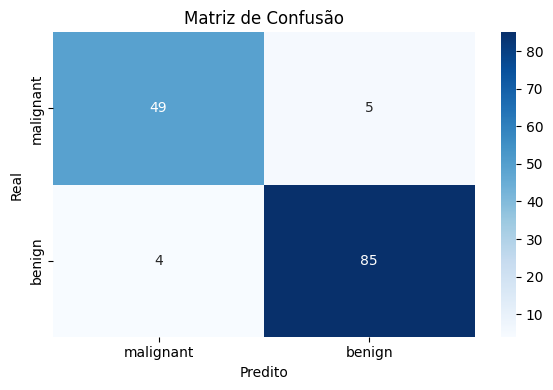

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()

###Treinamento com SVM (Support Vector Machine)


In [12]:
# Cria e configura o modelo SVM

svc_model = SVC(
    C=1.0,
    kernel='rbf',
    gamma='scale',
    random_state=42
)

# Treina o modelo
svc_model.fit(X_treinamento, Y_treinamento)

SVC(random_state=42)

###Avaliação do modelo SVM

In [13]:
# Faz predições com o modelo SVM
y_pred_svc = svc_model.predict(X_teste)

In [14]:
# Calcula a acurácia da SVM
accuracy_svc = accuracy_score(Y_teste, y_pred_svc)
accuracy_svc

0.9090909090909091

###Matriz de confusão SVM

In [15]:
# Gera a matriz de confusão
matriz_confusao_svc = confusion_matrix(Y_teste, y_pred_svc)
matriz_confusao_svc

array([[46,  8],
       [ 5, 84]])

###Gráfico matriz de confusão SVM

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(matriz_confusao_svc, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()

##Análise final das matrizes de confusão

###Matriz de Confusão - Random Forest



*   49 verdadeiros negativos (tumores malignos corretamente classificados)
*   85 verdadeiros positivos (tumores benignos corretamente classificados)
*   5 falsos negativos (tumores malignos classificados como benignos incorretamente)
*   4 falsos positivos (tumores benignos classificados com malignos incorretamente)

Conclusão: o modelo Random Forest teve ótima perfomance, com acurácia de 93,7%.


###Matriz de confusão - SVM (Support Vector Machine)

*   46 verdadeiros negativos.
*   84 verdadeiros positivos.
*   8 falsos positivos.
*   5 falsos negativos.

Conclusão: A SVM também teve um bom desempenho, com acurácia de 90,9%, mas cometeu mais erros que o Random Forest (13 erros no total). O modelo errou mais ao classificar tumores malignos como benignos, o que pode ser mais crítico em um contexto médico.